# 2019 DA Project

## Project Plan

- Choose a real world phenomenon
- Research and understand the phenomenon
- Identify variables 
- Match variables to a distribution
- Synthesise the dataset
- Analyse variables and their inter relationships
- Devise an algorithm or method to synthesise those variables
- Generate dataset

## Introduction

About one third of the food produced in the world for human consumption every year — approximately 1.3 billion tonnes — gets lost or wasted. Fruit and vegetables, have the highest wastage rates of any food.
http://www.fao.org/save-food/resources/keyfindings/en/

With an increase in food demand in the world, reducing waste in each stage of the food chain is essential. Food waste is senseless and immoral given the hundreds of millions of people that do not have enough food to eat.  There are several contributors to the losses worldwide, unsuitable harvest timing, weather conditions, handling practices, retail losses and household waste. 

Perishable products are often highly temperature and humidity dependent.  It is a challenge to minimum waste.  One way to extend the life of perishable food is to create a more ambient environment.  Apples for example can be purchases all year round thanks to investment in suitable storage.

## Research

### Apples

Apples once harvested have to overcome many obstacles during their journey to the customer and then may end up in the bin, as happens to nearly one third of food produced worldwide. 
https://www.climateforesight.eu/water-food/uneaten-apple-climate-change/

**Storage conditions**
Apples are mainly stored in cool areas with controlled temperatures. They can be stored for up to 12 months with CA/ULO storage and remain in good condition at a temperature of between 0 and 5 ºC, depending on the variety. In order to keep moisture loss to a minimum, apples should be stored in 90-95% atmospheric humidity. 
Oxygen levels should range from 1.5 to 2.5 percent (ambient oxygen is about 21 percent), and adjusts the carbon dioxide, essentially putting the apples to sleep.
https://www.npr.org/sections/thesalt/2018/11/26/668256349/thanks-to-science-you-can-eat-an-apple-every-day?t=1575821675123

Sleepier apples have slower respiration rates and stay firm, colorful, flavorful and nutritionally dense for longer. The trick is to avoid bringing the oxygen levels too low, otherwise the apples will ferment.

Optimum storage conditions for apples
 - Temperature 0 - 5 degrees
 - Humidity 90 - 95%
 - Shelf life 365 days
 - Oxygen level 1.5 to 2.5%

## Variables

Determine the variables.  4 variables have been identified: 

#### Variable 1 : Temperature
Appples should be stored between 0 to 5 degrees celcius. A normal distribution is appropriate.

#### Variable 2 : Humidity
Relative humidity shoud be 90 - 95 %.  A normal distribution is appropriate.

#### Variable 3:  Shelf Life
365 days.  A normal distribution is appropriate.
 
#### Variable 4:  Oxygen levels
Oxygen level 1.5 to 2.5%  A normal distribution is therefore appropriate.

## Import Libriaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import string
from random import choices

In [2]:
# Make matplotlib show interactive plots in the notebook.
%matplotlib inline
# Apply the default seaborn settings
sns.set()

### Establish size of dataset

In [3]:
# Dataset comprises 1000 apples and is called apple
apple = 1000

## Match Variables to Distributions

### Variables.

In [4]:
# Generate data for temperature, humidity & shelf life using np.random.normal and call it data
# Temperature is -1 to - 4 degrees, humidity is 92% to 95% & shelf life is 10 to 14 days
# set the seed
np.random.seed(0)
data = {"temperature": np.around(np.random.normal(2.5,2.5,apple),0),
        "humidity": np.around(np.random.normal(92.5,2.5,apple),0), 
        "shelf_life": np.around(np.random.normal(365,1,apple),0),
        "oxygen": np.around(np.random.normal(2,.5,apple),0),
        "variety": np.random.choice(['granny smith', 'red delicious', 'gala', 'golden delicious'], 
                                    size = apple, p = [0.1, 0.3, 0.4, 0.2])}
# Create a pandas dataframe from the data above and call it df
df = pd.DataFrame(data=data)
# output df
df

,temperature,humidity,shelf_life,oxygen,variety
0,7.0,94.0,363.0,3.0,gala
1,4.0,95.0,363.0,2.0,gala
2,5.0,91.0,365.0,2.0,golden delicious
3,8.0,93.0,364.0,2.0,gala
4,7.0,93.0,365.0,1.0,gala
...,...,...,...,...,...
995,4.0,93.0,367.0,2.0,golden delicious
996,2.0,96.0,364.0,3.0,gala
997,3.0,93.0,365.0,2.0,red delicious
998,-0.0,90.0,364.0,3.0,gala


In [5]:
df.describe()

,temperature,humidity,shelf_life,oxygen
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,2.385000,92.54500,364.953000,1.993000
std,2.483736,2.45316,1.002894,0.585913
min,-5.000000,85.00000,362.000000,0.000000
25%,1.000000,91.00000,364.000000,2.000000
50%,2.000000,93.00000,365.000000,2.000000
75%,4.000000,94.00000,366.000000,2.000000
max,9.000000,100.00000,368.000000,4.000000


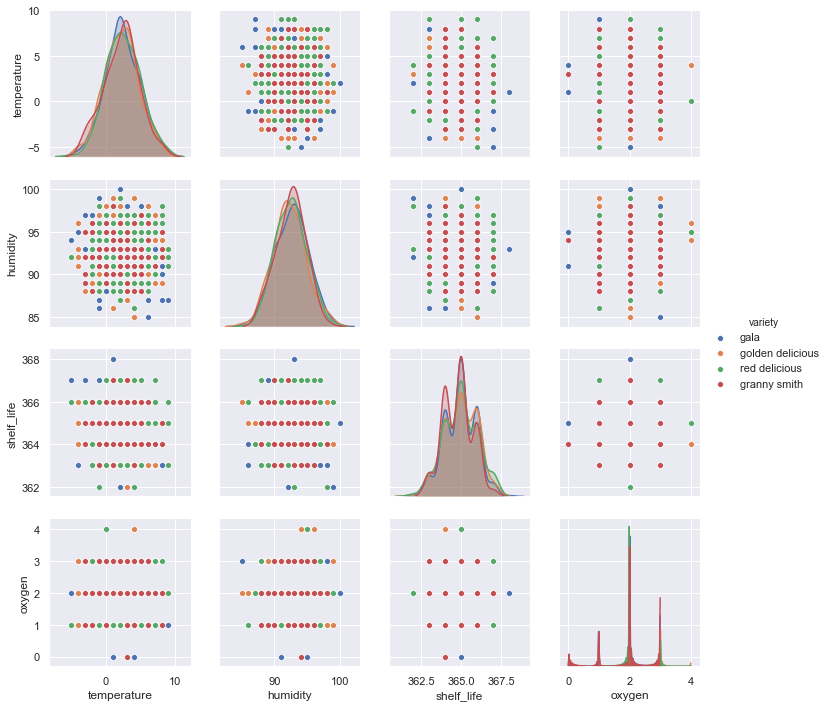

In [6]:
sns.pairplot(df,hue='variety')

In [7]:
# Convert colour from categorical to numerical
df['variety_codes'] = df['variety'].astype('category').cat.codes

In [16]:
# Create a reuseable function and include variables of temperature, humidity and shelf life
def get_label(temperature, humidity, shelf_life):
# Find out if temperature is out of range
  if temperature < 0 or temperature > 5:
# Return 1 if out of range
    return 1
# Find out if humidity is out of range
  elif humidity < 90 or humidity > 95:
# Return 1 if out of range
    return 1
# Find out if shelf life is out of range
  elif shelf_life < 0 or shelf_life > 365:
# Return 1 if out of range
    return 1
# Otherwise return 0
  return 0
# Add a variable and call it waste
df['waste'] = df.apply(lambda row: get_label(row['temperature'], 
                                             row['humidity'],
                                             row['shelf_life']), axis=1)
df

,temperature,humidity,shelf_life,oxygen,variety,variety_codes,waste
0,7.0,94.0,363.0,3.0,gala,0,1
1,4.0,95.0,363.0,2.0,gala,0,0
2,5.0,91.0,365.0,2.0,golden delicious,1,0
3,8.0,93.0,364.0,2.0,gala,0,1
4,7.0,93.0,365.0,1.0,gala,0,1
...,...,...,...,...,...,...,...
995,4.0,93.0,367.0,2.0,golden delicious,1,1
996,2.0,96.0,364.0,3.0,gala,0,1
997,3.0,93.0,365.0,2.0,red delicious,3,0
998,-0.0,90.0,364.0,3.0,gala,0,0


Dataset complete.  Time to analyse

In [ ]:
# Adapted from https://stackoverflow.com/questions/49609353/pandas-dataframe-to-csv-not-exporting-all-rows/53606044
df.to_csv("sc.csv", index=False, sep=',', mode='w')

In [ ]:
sc = pd.read_csv('https://raw.githubusercontent.com/mhurley100/DA-Project-2019/master/sc.csv', sep=',')

## References
 - [1] Python Software Foundation. Welcome to python.org.   
https://www.python.org/
 - [2] GMIT. Quality assurance framework.   
https://www.gmit.ie/general/quality-assurance-framework
 - [3] Software Freedom Conservancy. Git.   
https://git-scm.com/
 - [4] Project Jupyter. Project jupyter.    
https://jupyter.org/
 - [5] NumPy developers. Numpy.    
http://www.numpy.org/
 - [6] Clear Spider             
https://www.clearspider.com/blog-reduce-inventory-shortages/
 - [7] University of New Brunswick, NB Canada Fredericton   
http://www2.unb.ca/~ddu/4690/Lecture_notes/Lec2.pdf
 - [8] Buildmedia     
https://buildmedia.readthedocs.org/media/pdf/supplychainpy/latest/supplychainpy.pdf
 - [9] Pynative             
https://pynative.com/python-random-choice/
 - [10] Scipy          
 https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
 - [11] Wikipedia             
https://en.wikipedia.org/wiki/ABC_analysis
 - [12] Researchgate
https://www.researchgate.net/publication/227520884_Supply_Chain_Strategies_for_Perishable_Products_The_Case_of_Fresh_Produce
 - [13] EC.europa
http://ec.europa.eu/environment/life/project/Projects/index.cfm?fuseaction=search.dspPage&n_proj_id=5007&docType=pdf
 - [14] link.springer
https://link.springer.com/article/10.1007/s40092-018-0287-1